In [2]:
using Pkg
pkg_folder = "../"
Pkg.activate(pkg_folder)

import Markdown; Base.showable(::MIME"text/markdown", ::Markdown.MD) = false # to make sth like """?replace"""  works for vscode backend, remember to choose Jupyter kernel
include(pkg_folder*"src/initialize.jl")

@show Threads.nthreads() # check number of threads

  Activating 

Threads.nthreads() = 1

project at `~/Documents/GitHub/Bnc_julia`


1

In [3]:
q_sym = [:qE, :qS]
K_sym = [:K]
x_sym = [:E, :S, :C]

N = [1 1 -1]

model = Bnc(N=N, x_sym=x_sym, q_sym=q_sym, K_sym=K_sym)

find_all_vertices!(model)
summary(model)

---------------------Start finding all vertices, it may takes a while.--------------------
Finished, with 4 vertices found and 4 asymptotic vertices.

-------------Start calculating nullity for each vertex, it also takes a while.------------
1.Building Nρ_inv cache in parallel...
2.Calculating nullity for each vertex in parallel...
3.Storing all vertices information...
Done.
----------Binding Network Summary:-------------
Number of species (n): 3
Number of conserved quantities (d): 2
Number of reactions (r): 1
L matrix: [1 0 1; 0 1 1]
N matrix: [1 1 -1]
Direction of binding reactions: backward
Catalysis involved: No
Regimes constructed: Yes
Number of regimes: 4
  - Invertible + Asymptotic: 3
  - Singular +  Asymptotic: 1
  - Invertible +  Non-Asymptotic: 0
  - Singular +  Non-Asymptotic: 0
-----------------------------------------------


In [4]:
show_conservation(model)

2-element Vector{Equation}:
 qE ~ C + E
 qS ~ C + S

----------------Start calculating vertices neighbor graph, It may takes a while.----------------
Done.

-------Start calculating vertices neighbor graph with qK change dir, It may takes a while.------------
Done.



┌ Info: Number of polyhedra to calc volume: 3
└ @ Main /Users/wuxiaoyu/Documents/GitHub/Bnc_julia/src/volume_calc.jl:17
┌ Info: All regimes converged after 400000 samples.
└ @ Main /Users/wuxiaoyu/Documents/GitHub/Bnc_julia/src/volume_calc.jl:55
┌ Info: Total samples: 400000, Elapsed: 0.23 s
└ @ Main /Users/wuxiaoyu/Documents/GitHub/Bnc_julia/src/volume_calc.jl:121


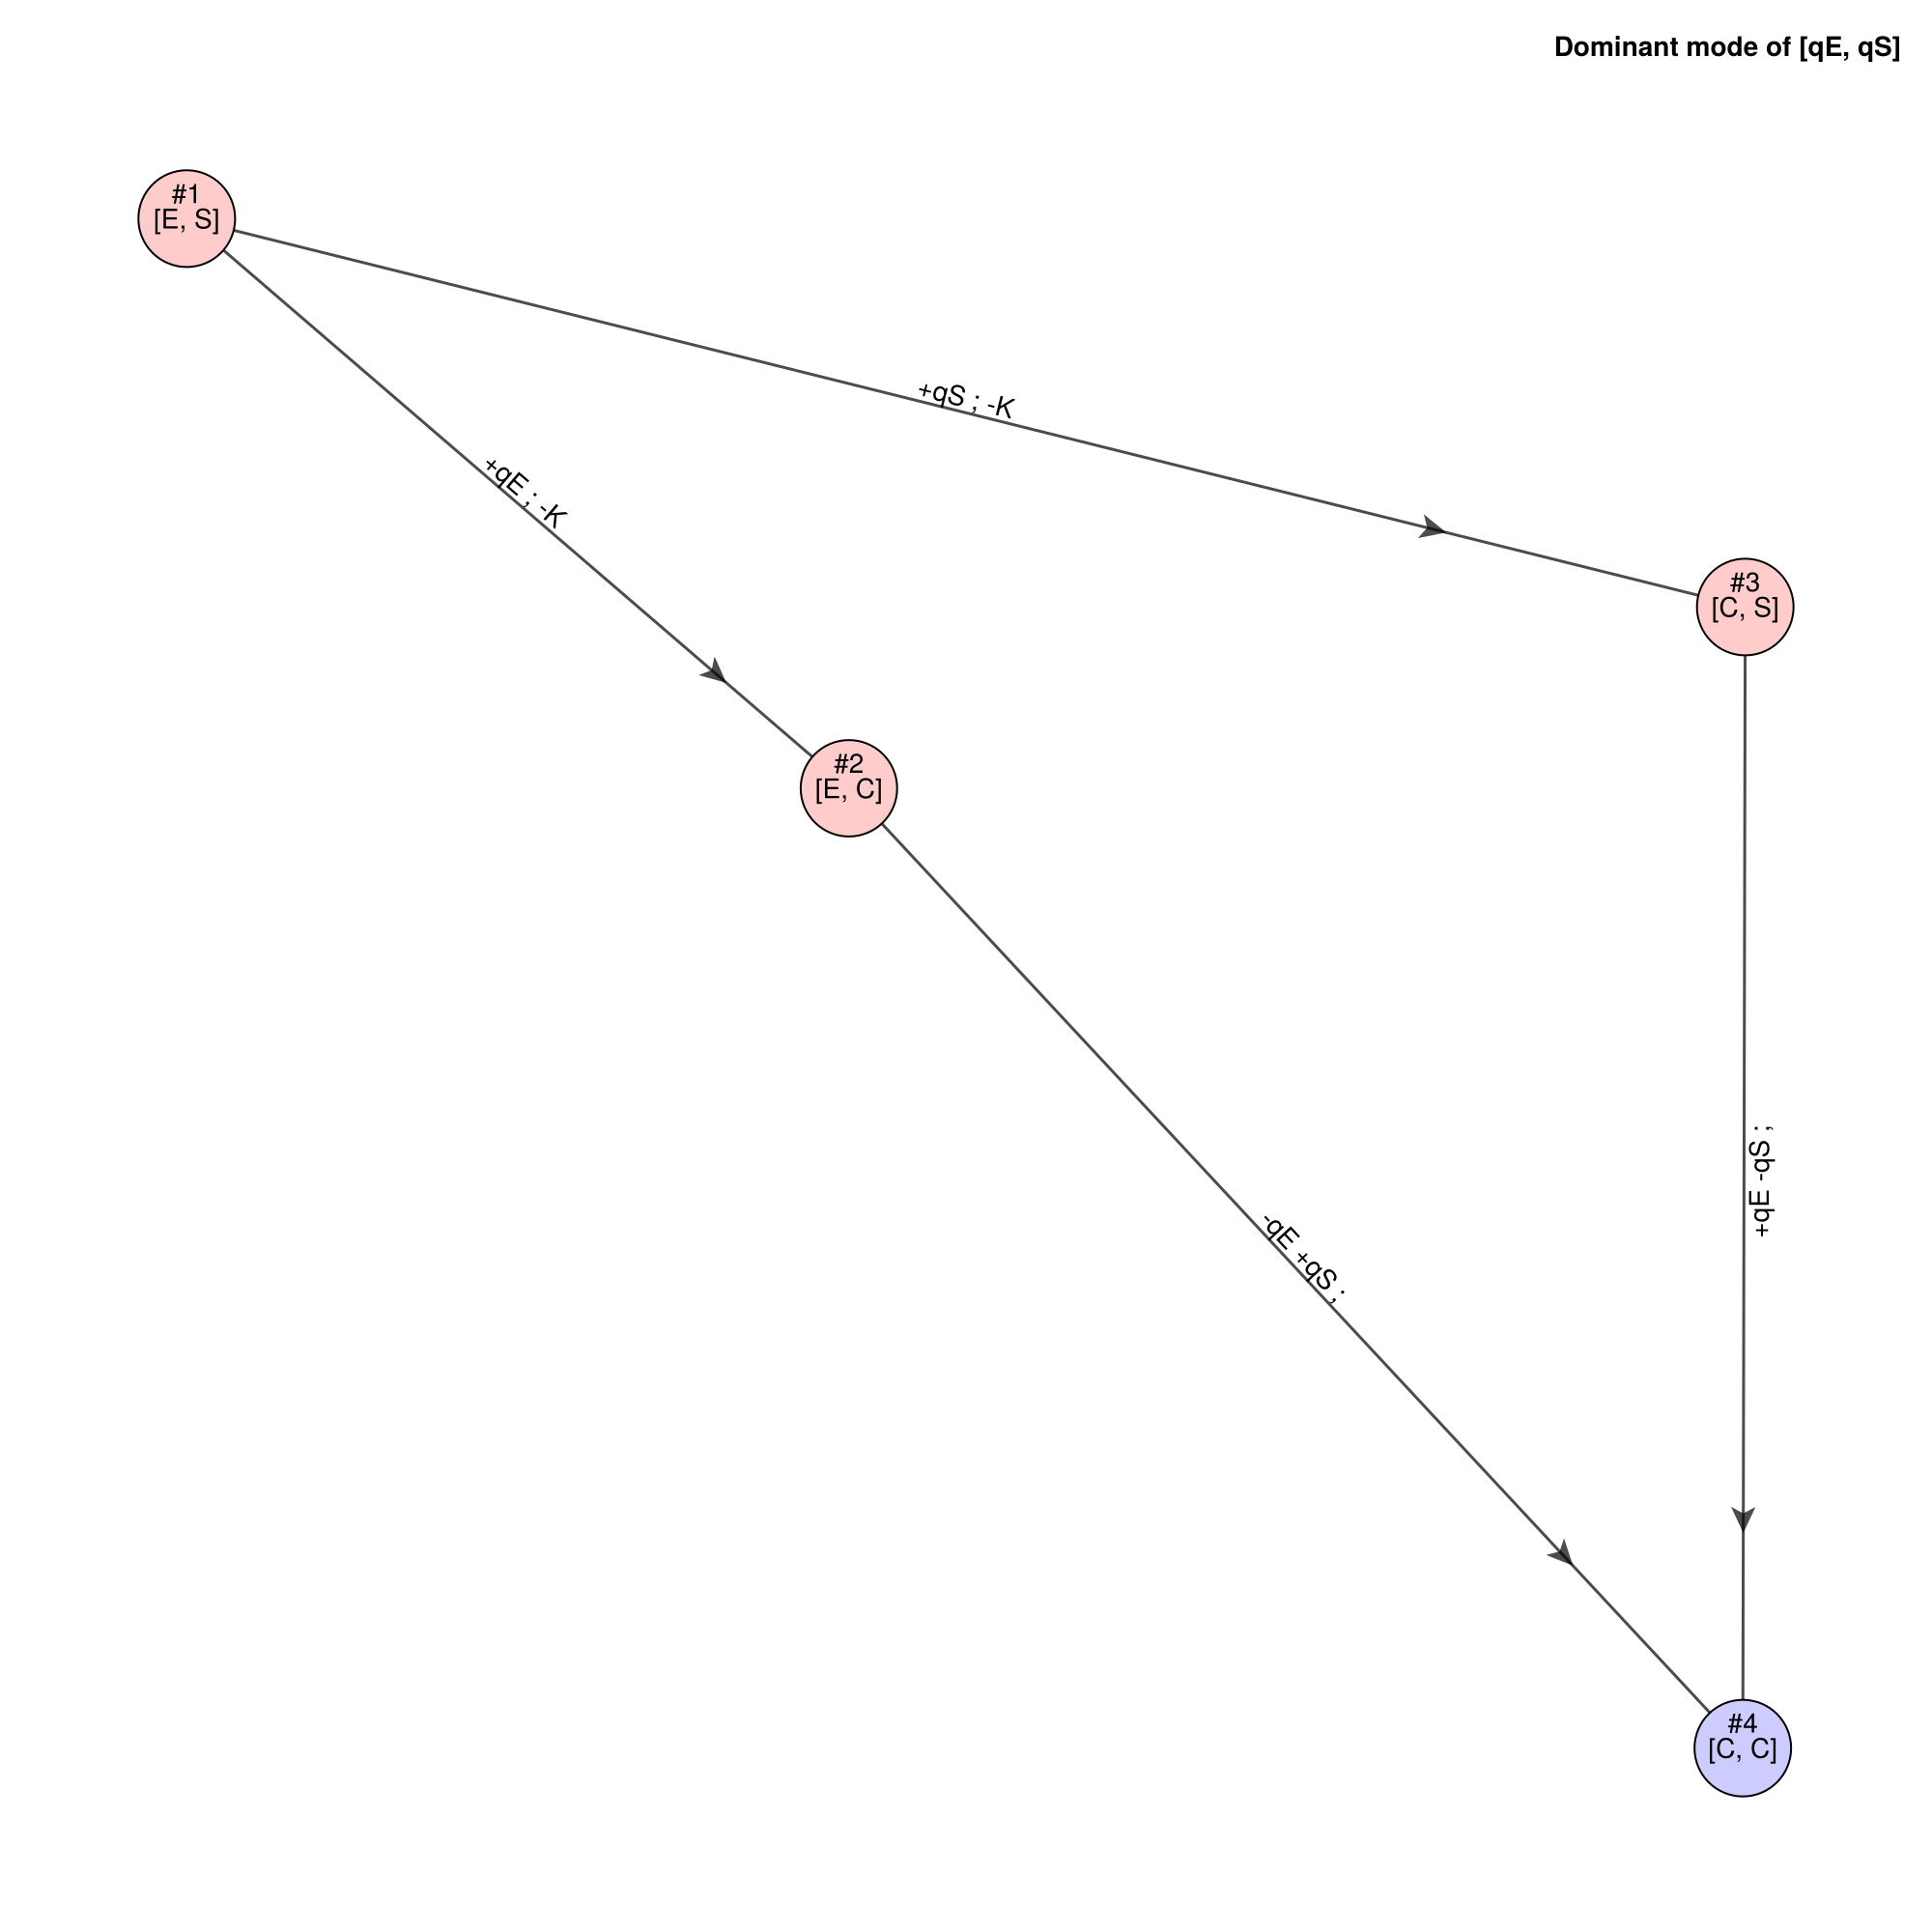

CairoMakie.Screen{IMAGE}


In [5]:
f,ax,p = draw_vertices_neighbor_graph(model)
add_vertices_idx!(ax, p)
display(f)

In [6]:
grh = SISO_graph(model, :qS)
summary_path(grh, :C) |> render_path

┌ Info: sources: [2, 1]
└ @ Main /Users/wuxiaoyu/Documents/GitHub/Bnc_julia/src/regime_graphs.jl:232
┌ Info: sinks: [3]
└ @ Main /Users/wuxiaoyu/Documents/GitHub/Bnc_julia/src/regime_graphs.jl:233
┌ Info: Number of polyhedra to calc volume: 2
└ @ Main /Users/wuxiaoyu/Documents/GitHub/Bnc_julia/src/volume_calc.jl:17


Path [1]              1 → 0                         	  Volume: 0.5009 ± 0.0022


┌ Info: All regimes converged after 200000 samples.
└ @ Main /Users/wuxiaoyu/Documents/GitHub/Bnc_julia/src/volume_calc.jl:55
┌ Info: Total samples: 200000, Elapsed: 0.11 s
└ @ Main /Users/wuxiaoyu/Documents/GitHub/Bnc_julia/src/volume_calc.jl:121


Path [2]              1 → NaN → 0                   	  Volume: 0.4991 ± 0.0022


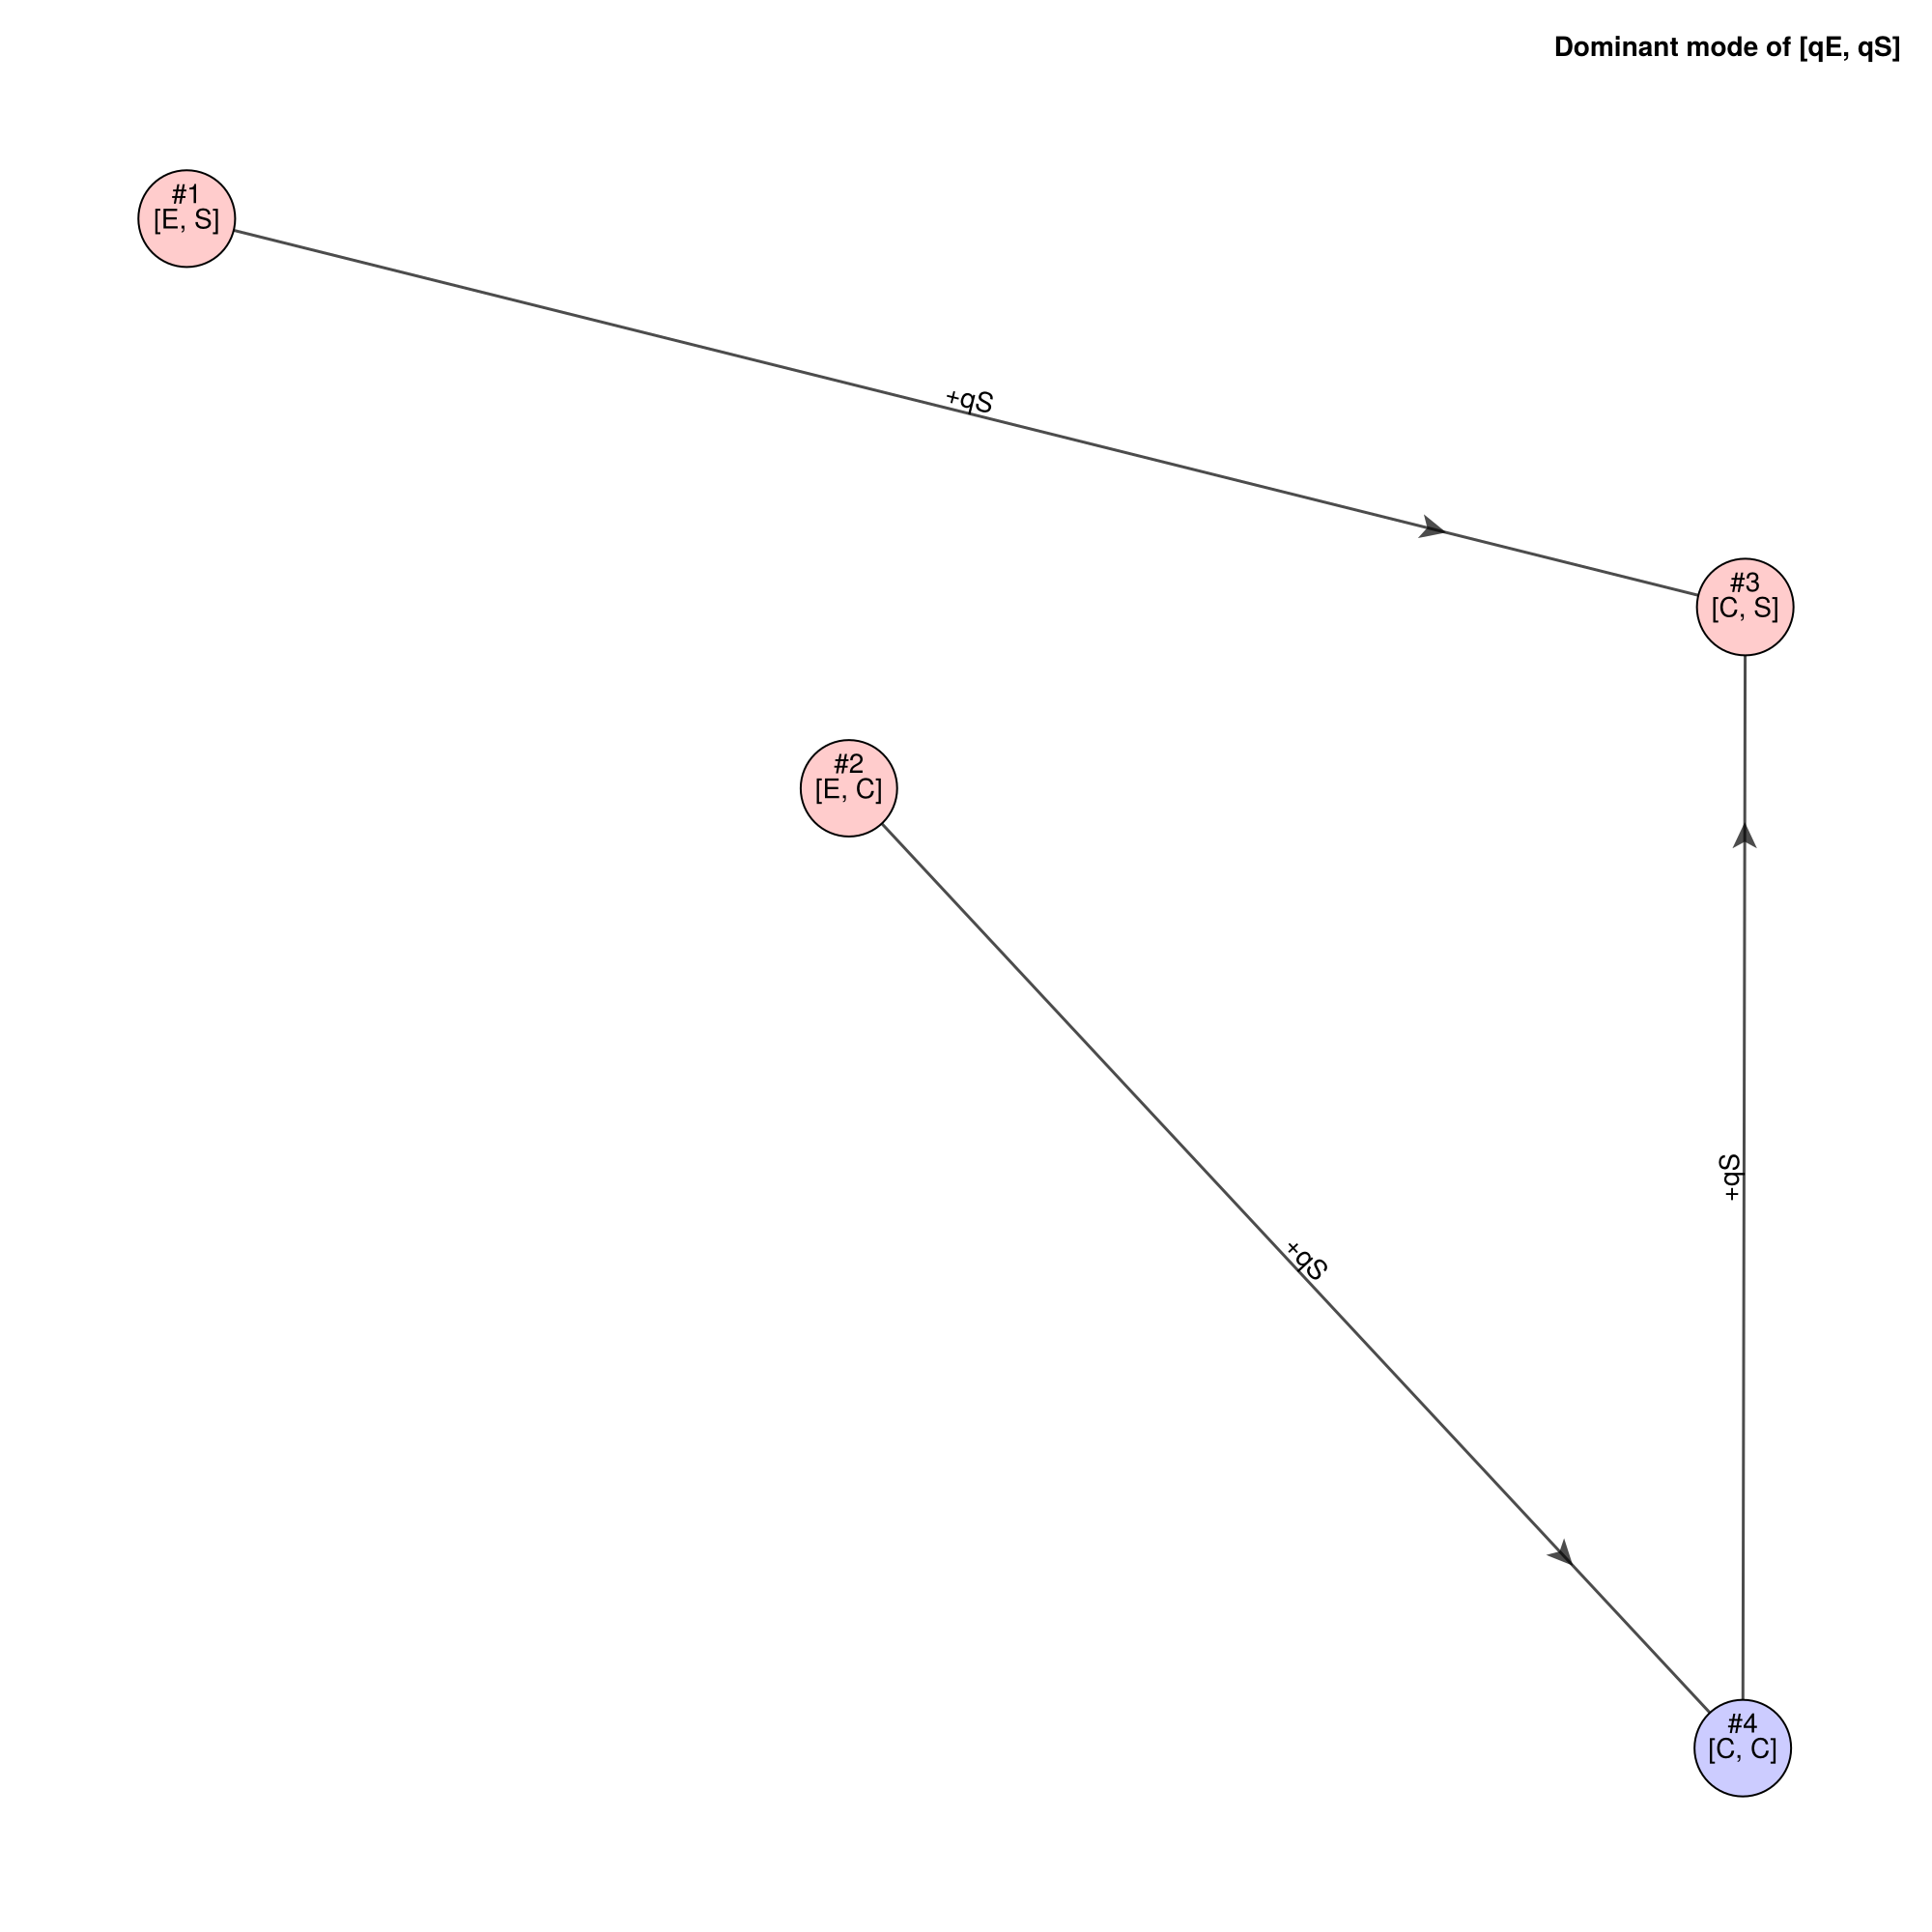

CairoMakie.Screen{IMAGE}


In [7]:
f, ax, p = draw_vertices_neighbor_graph(grh)
add_vertices_idx!(ax, p)
display(f)

In [8]:
find_reaction_order_for_path(grh,:C;keep_singular=true,keep_nonasymptotic=true) |> render_path

Path 1                1 → 0                         
Path 2                1 → NaN → 0                   


In [9]:
summary_path(grh, :C) |> render_path

Path [1]              1 → 0                         	  Volume: 0.5009 ± 0.0022
Path [2]              1 → NaN → 0                   	  Volume: 0.4991 ± 0.0022


In [10]:
show_path(grh)

Path 1                #1 → #3                       	  Volume: 0.5009 ± 0.0022
Path 2                #2 → #4 → #3                  	  Volume: 0.4991 ± 0.0022


In [11]:
show_dominant_condition(model, 1)

2-element Vector{Equation}:
 log10(qE) ~ log10(E)
 log10(qS) ~ log10(S)

In [17]:
show_condition_qK(model, 1, log_space = false)

2-element Vector{Num}:
 K > qS
 K > qE

parameters = [-3.5337088252115008, 0.46629117478849913]
(crange, cmap_disc) = ((1, 2), PlotUtils.CategoricalColorGradient(ColorSchemes.ColorScheme{Vector{ColorTypes.RGBA{Float64}}, String, String}(ColorTypes.RGBA{Float64}[RGBA(0.5019607843137255, 0.0, 0.5019607843137255, 1.0), RGBA(1.0, 0.0, 0.0, 1.0)], "", ""), [0.0, 0.5, 1.0]))


┌ Info: Change in logqS
└ @ Main /Users/wuxiaoyu/Documents/GitHub/Bnc_julia/src/visualize.jl:40
┌ Info: parameters: Pair{Num, Float64}[qE => -3.5337088252115008, K => 0.46629117478849913]
└ @ Main /Users/wuxiaoyu/Documents/GitHub/Bnc_julia/src/visualize.jl:41
┌ Info: Target syms contains: logE 
└ @ Main /Users/wuxiaoyu/Documents/GitHub/Bnc_julia/src/visualize.jl:48
┌ Info: Target syms contains: logS 
└ @ Main /Users/wuxiaoyu/Documents/GitHub/Bnc_julia/src/visualize.jl:48
┌ Info: Target syms contains: logC 
└ @ Main /Users/wuxiaoyu/Documents/GitHub/Bnc_julia/src/visualize.jl:48


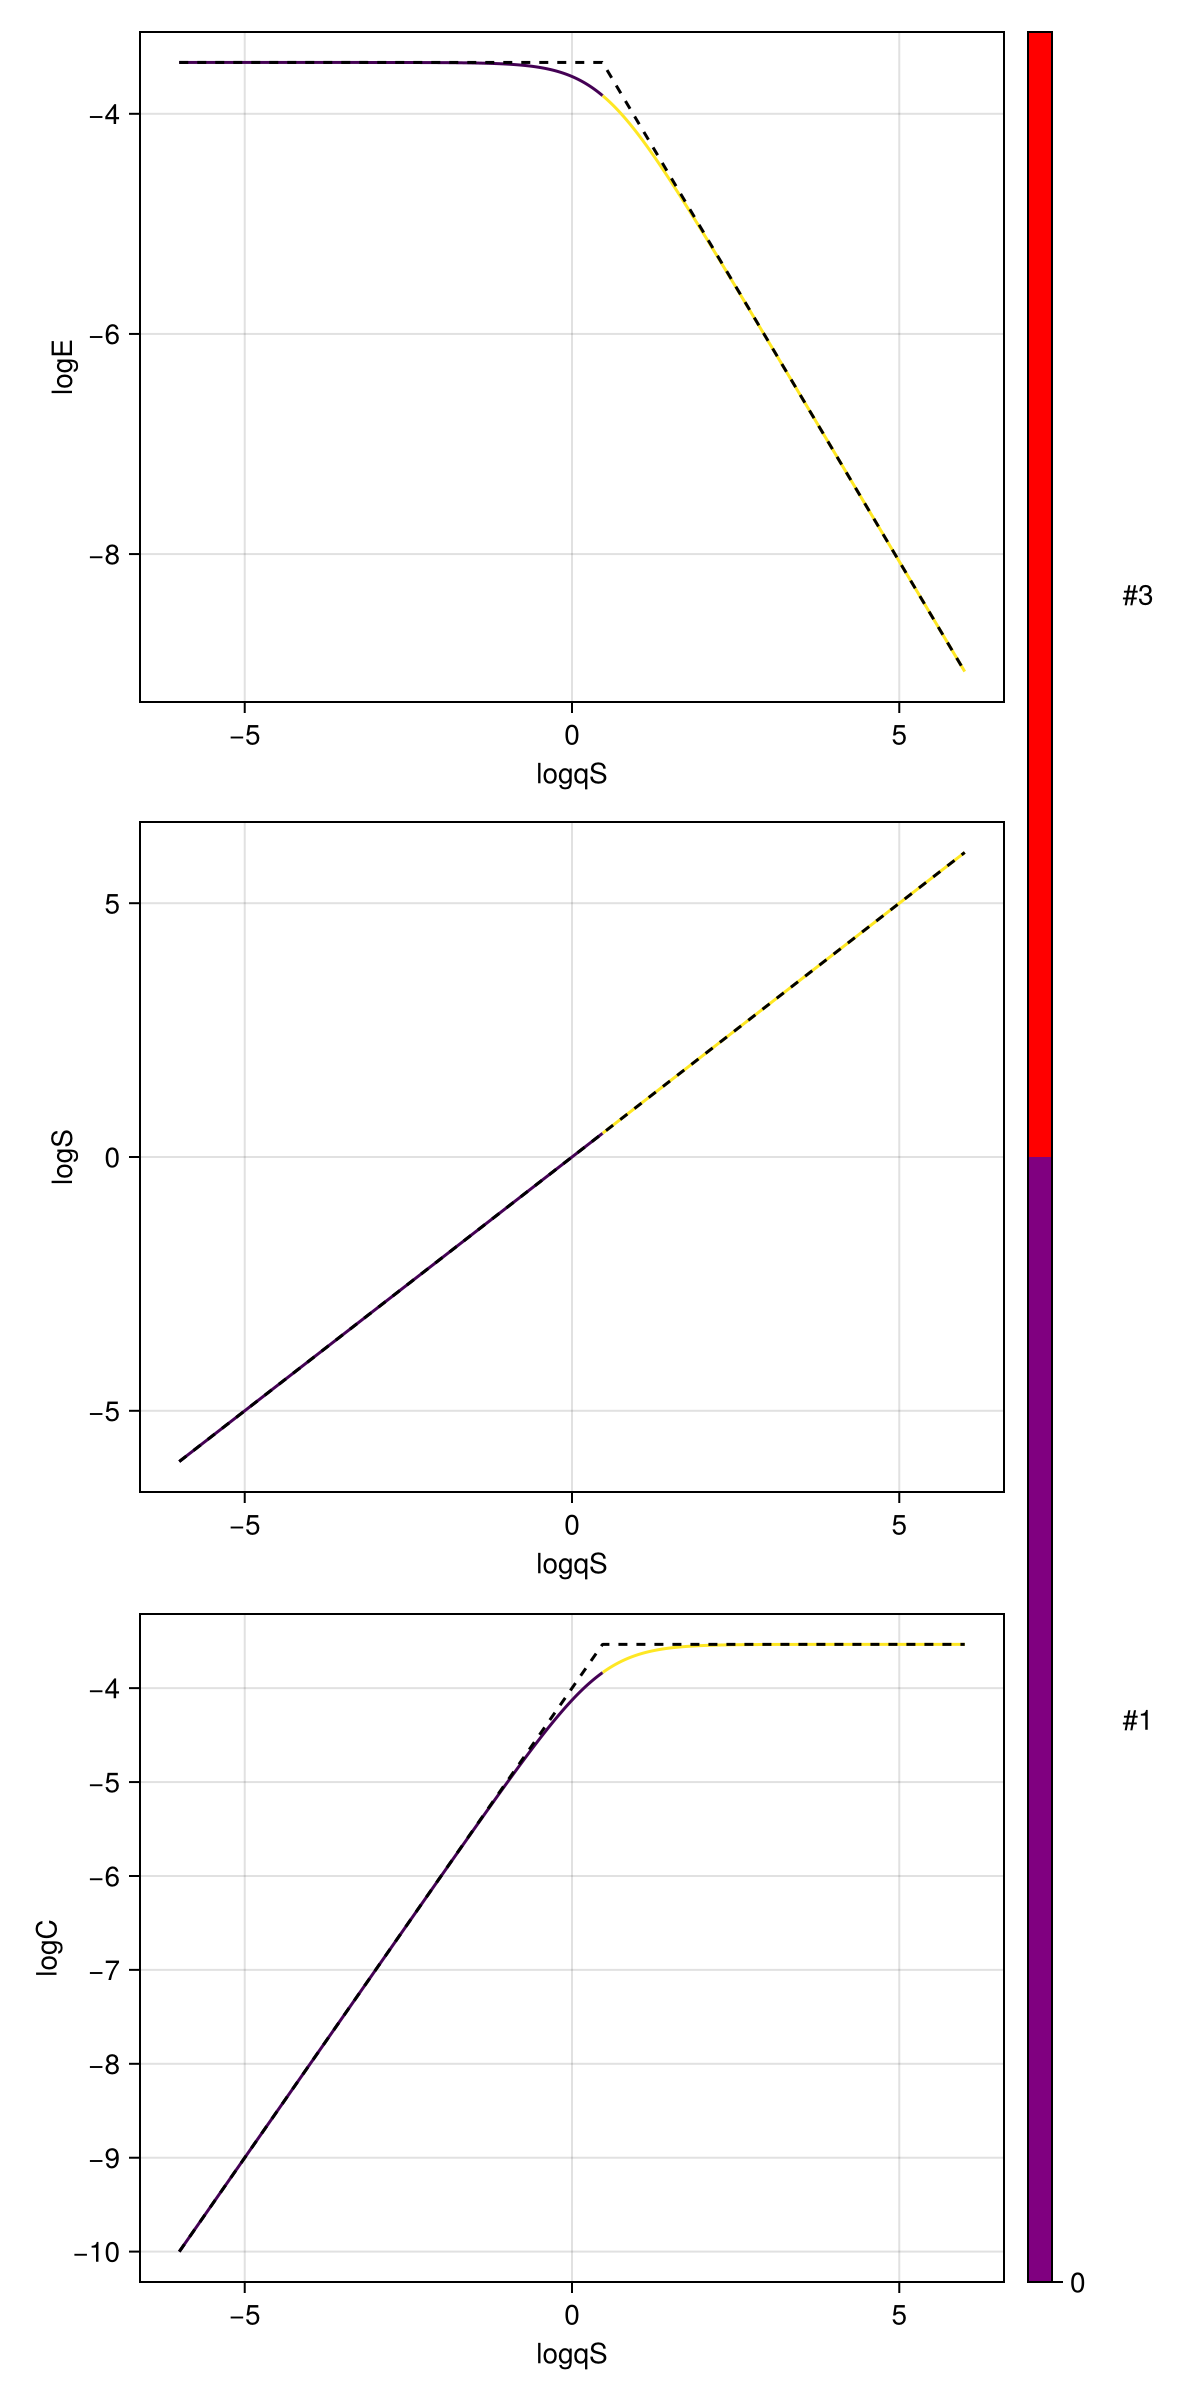

CairoMakie.Screen{IMAGE}


In [18]:
f = SISO_plot(grh, 1; add_archeatype_lines=true, start=-6, stop=6, size=(600,1200),rand_line=true,extend=4)
display(f)